<a href="https://colab.research.google.com/github/hritikchaturvedi11/MLnow_girlscript/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g4Bbk7UfPAea1sXgSQeXexKwar6EtGTE3oiErF-cagGn-RIYuHuEd4
Mounted at /content/drive


In [2]:
%cd '/content/drive/MyDrive/Machine Learning google colab/EDA/student'

/content/drive/MyDrive/Machine Learning google colab/EDA/student


In [3]:
ls

student-mat.csv     student-merge.R  student.txt
student-mat.gsheet  student-por.csv


Importing the nessesary libraries

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
from tensorflow import keras

Importing the data

In [14]:
mathData = pd.read_csv('student-mat.csv',sep=';');

In [6]:
mathData.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


In [19]:
print(f'school: {mathData.school.unique()}')
print(f'sex: {mathData.sex.unique()}')
print(f'address: {mathData.address.unique()}')
print(f'Mjob: {mathData.Mjob.unique()}')
print(f'Fjob: {mathData.Fjob.unique()}')
print(f'higher: {mathData.higher.unique()}')

school: ['GP' 'MS']
sex: ['F' 'M']
address: ['U' 'R']
Mjob: ['at_home' 'health' 'other' 'services' 'teacher']
Fjob: ['teacher' 'other' 'services' 'health' 'at_home']
higher: ['yes' 'no']


In [20]:
#convert the categories into numbers 

#binary valued 

mathData['school'] = mathData['school'].apply({'GP':1, 'MS':0}.get)
mathData['sex'] = mathData['sex'].apply({'F':1, 'M':0}.get)
mathData['address'] = mathData['address'].apply({'U':1, 'R':0}.get)
mathData['higher'] = mathData['higher'].apply({'yes':1, 'no':0}.get)


#multi-valued
mathData['Mjob'] = mathData['Mjob'].apply({'at_home':1, 'health':2, 'other':3, 'services':4, 'teacher':5}.get)
mathData['Fjob'] = mathData['Fjob'].apply({'at_home':1, 'health':2, 'other':3, 'services':4, 'teacher':5}.get)

mathData.head(20)

,school,sex,address,Mjob,Fjob,higher,studytime,freetime,absences,G1,G2,G3
0,1,1,1,1,5,1,2,3,6,5,6,6
1,1,1,1,1,3,1,2,3,4,5,5,6
2,1,1,1,1,3,1,2,3,10,7,8,10
3,1,1,1,2,4,1,3,2,2,15,14,15
4,1,1,1,3,3,1,2,3,4,6,10,10
5,1,0,1,4,3,1,2,4,10,15,15,15
6,1,0,1,3,3,1,2,4,0,12,12,11
7,1,1,1,3,5,1,2,1,6,6,5,6
8,1,0,1,4,3,1,2,2,0,16,18,19
9,1,0,1,3,3,1,2,5,0,14,15,15


In [21]:
#selecting columns
mathData=mathData[['school','sex','address','Mjob','Fjob','higher','studytime','freetime','absences','G1','G2','G3']]

In [22]:
mathData.head(3)

,school,sex,address,Mjob,Fjob,higher,studytime,freetime,absences,G1,G2,G3
0,1,1,1,1,5,1,2,3,6,5,6,6
1,1,1,1,1,3,1,2,3,4,5,5,6
2,1,1,1,1,3,1,2,3,10,7,8,10


In [23]:
mathData.to_csv('cleanMathData.csv') # export MathData as CleanMathData to a csv

In [24]:
ls

cleanMathData.csv  student-mat.gsheet  student-por.csv
student-mat.csv    student-merge.R     student.txt


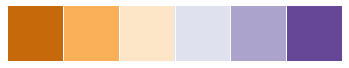

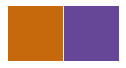

In [28]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) # Purple to orange colors
pal= sns.color_palette('PuOr',6) # Print 6 colors shades from purple to orange
pal.as_hex()  # set hex codes values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c','#664697'] # orange color hex codes
sns.set_palette(sns_colors)  # set the pallete for sns colors
sns.palplot(sns.color_palette(sns_colors))  # plot the color codes

In [30]:
mathData.columns

Index(['school', 'sex', 'address', 'Mjob', 'Fjob', 'higher', 'studytime',
       'freetime', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

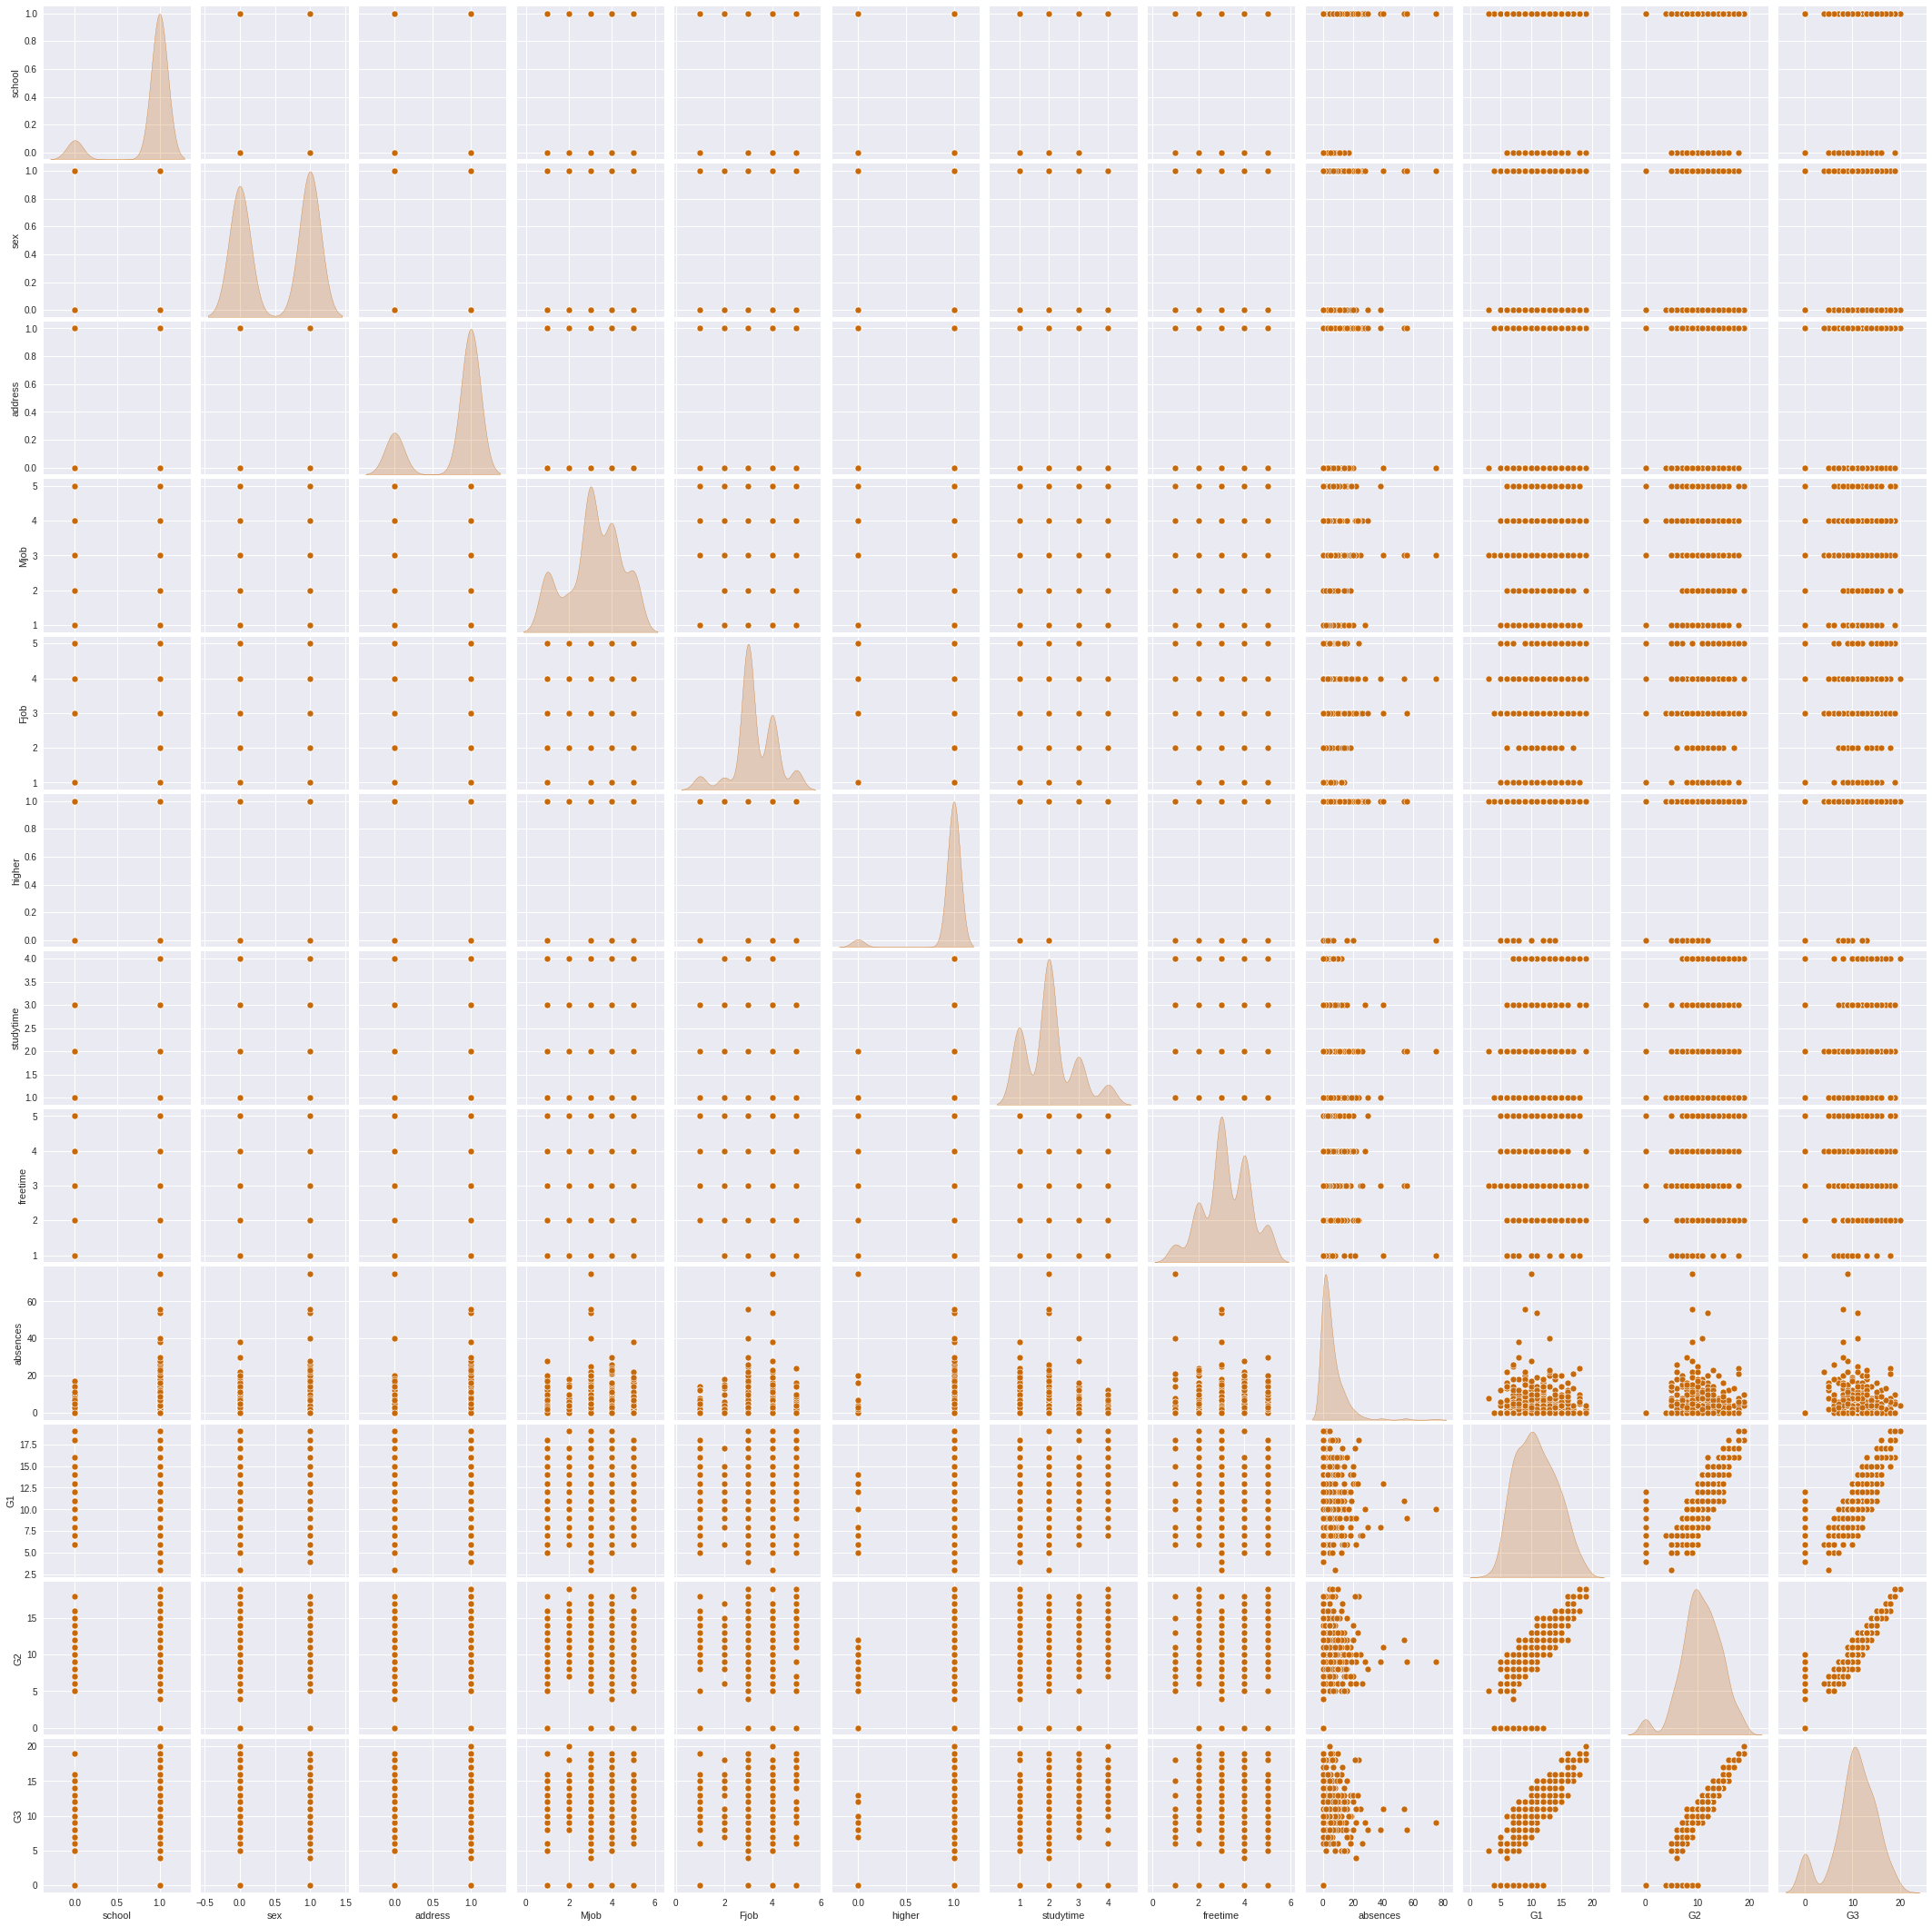

In [33]:
# Pairplot for all the data

sns.pairplot(mathData,
    x_vars=['school', 'sex', 'address', 'Mjob', 'Fjob', 'higher', 'studytime',
       'freetime', 'absences', 'G1', 'G2', 'G3'],
       y_vars=['school', 'sex', 'address', 'Mjob', 'Fjob', 'higher', 'studytime',
       'freetime', 'absences', 'G1', 'G2', 'G3'],
       diag_kind='kde'
)

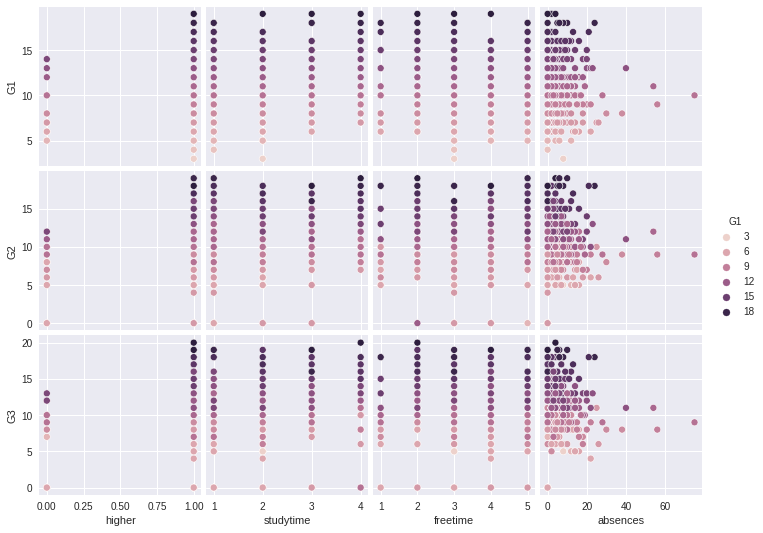

In [35]:
# Pairplot for all the data

sns.pairplot(mathData,
    x_vars=['higher', 'studytime','freetime', 'absences'],
       y_vars=['G1', 'G2', 'G3'],
       diag_kind='kde',hue='G1'
)

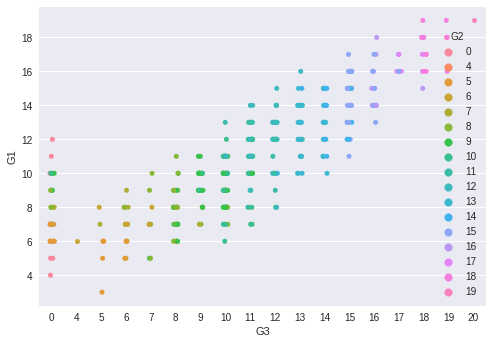

In [39]:
#Strip PLot --> plotting a graph
sns.stripplot(y='G1',x='G3',data=mathData,hue='G2')

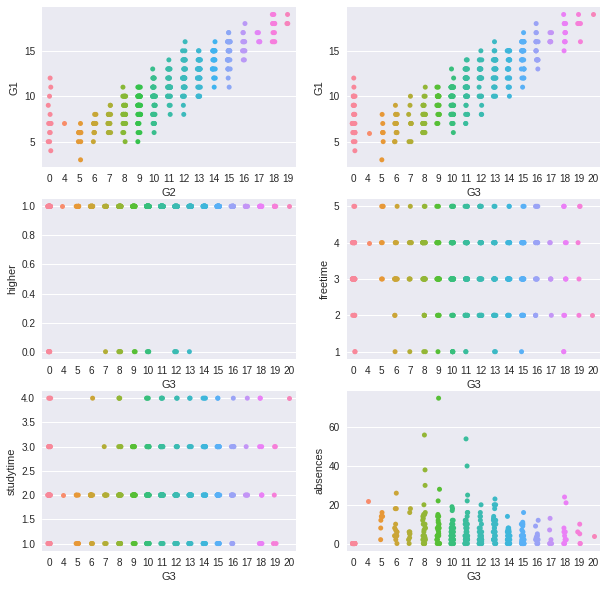

In [44]:
#Subplots --> Plotting subplots together

fig, axarr = plt.subplots(3,2,figsize=(10,10))
sns.stripplot(y='G1',x='G2',data=mathData,hue=None,ax=axarr[0][0])
sns.stripplot(y='G1',x='G3',data=mathData,hue=None,ax=axarr[0][1])

sns.stripplot(y='higher',x='G3',data=mathData,hue=None,ax=axarr[1][0])
sns.stripplot(y='freetime',x='G3',data=mathData,hue=None,ax=axarr[1][1])
sns.stripplot(y='studytime',x='G3',data=mathData,hue=None,ax=axarr[2][0])
sns.stripplot(y='absences',x='G3',data=mathData,hue=None,ax=axarr[2][1])


In [48]:
# 80-20 test-train data split
trainData = mathData.sample(frac=0.8,random_state=0)
testData = mathData.drop(trainData.index)
print(trainData)
print(testData)

     school  sex  address  Mjob  Fjob  ...  freetime  absences  G1  G2  G3
329       1    1        1     5     5  ...         3         4  14  14  14
318       1    1        0     1     4  ...         3         0  11  11  10
317       1    1        1     3     3  ...         3         9   9  10   9
65        1    1        1     5     4  ...         4         2  16  15  15
59        1    1        1     4     3  ...         2         2  15  16  16
..      ...  ...      ...   ...   ...  ...       ...       ...  ..  ..  ..
279       1    0        1     5     4  ...         2         8  10  11  10
227       1    0        1     4     4  ...         3         2  12  11  12
148       1    0        1     5     5  ...         3         0   7   6   0
143       1    1        1     1     1  ...         4         2  14  14  13
180       1    0        1     5     3  ...         4        10   9   8   8

[316 rows x 12 columns]
     school  sex  address  Mjob  Fjob  ...  freetime  absences  G1  G2  G3


In [50]:
print(trainData.shape)
print(testData.shape)

(316, 12)
(79, 12)


In [56]:
trainFeatures=trainData.copy()
testFeatures=testData.copy()
print(trainFeatures.head())
print(testFeatures.head())

     school  sex  address  Mjob  Fjob  ...  freetime  absences  G1  G2  G3
329       1    1        1     5     5  ...         3         4  14  14  14
318       1    1        0     1     4  ...         3         0  11  11  10
317       1    1        1     3     3  ...         3         9   9  10   9
65        1    1        1     5     4  ...         4         2  16  15  15
59        1    1        1     4     3  ...         2         2  15  16  16

[5 rows x 12 columns]
    school  sex  address  Mjob  Fjob  ...  freetime  absences  G1  G2  G3
9        1    0        1     3     3  ...         5         0  14  15  15
25       1    1        1     4     4  ...         2        14   6   9   8
28       1    0        1     4     3  ...         3         4  11  11  11
31       1    0        1     4     4  ...         3         0  17  16  17
32       1    0        0     5     1  ...         5         0  17  16  16

[5 rows x 12 columns]


In [57]:
# Removing the G3 column and saving it in labels
trainLabel=trainFeatures.pop('G3')
testLabel=testFeatures.pop('G3')
print(trainLabel.head())
print(testLabel.head())

329    14
318    10
317     9
65     15
59     16
Name: G3, dtype: int64
9     15
25     8
28    11
31    17
32    16
Name: G3, dtype: int64


In [58]:
print(trainFeatures.head())
print(testFeatures.head())

     school  sex  address  Mjob  Fjob  ...  studytime  freetime  absences  G1  G2
329       1    1        1     5     5  ...          3         3         4  14  14
318       1    1        0     1     4  ...          3         3         0  11  11
317       1    1        1     3     3  ...          3         3         9   9  10
65        1    1        1     5     4  ...          2         4         2  16  15
59        1    1        1     4     3  ...          2         2         2  15  16

[5 rows x 11 columns]
    school  sex  address  Mjob  Fjob  ...  studytime  freetime  absences  G1  G2
9        1    0        1     3     3  ...          2         5         0  14  15
25       1    1        1     4     4  ...          1         2        14   6   9
28       1    0        1     4     3  ...          2         3         4  11  11
31       1    0        1     4     4  ...          2         3         0  17  16
32       1    0        0     5     1  ...          2         5         0  17  16

$G3_i = G1_i \times \theta_1 + \theta_0$

In [61]:
# For univariate problem will consider only G1 and G3
uniMathData = mathData[['G1','G3']]
uniMathData.to_csv('univariate_MathData_2.csv')

In [62]:
ls

cleanMathData.csv   student-merge.R  univariate_MathData_2.csv
student-mat.csv     student-por.csv
student-mat.gsheet  student.txt


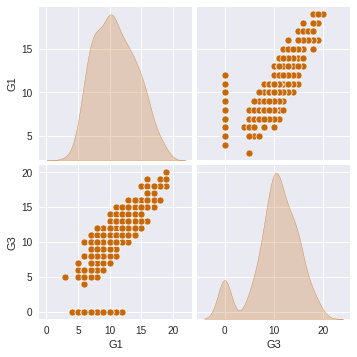

In [66]:
sns.pairplot(uniMathData,
             x_vars=['G1','G3'],
             y_vars=['G1','G3'],
             diag_kind='kde'
             )

In [67]:
uniTrainData = uniMathData.sample(frac=0.8,random_state=0)
uniTestData = uniMathData.drop(labels=uniTrainData.index)

In [68]:
print(uniTrainData.head())
print(uniTestData.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [75]:
uniTrainFeatures=uniTrainData.copy()
uniTestFeatures=uniTestData.copy()
print(uniTrainFeatures.head())
print(uniTestFeatures.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [76]:
uniTrainLabels=uniTrainFeatures.pop('G3')
uniTestLabels=uniTestFeatures.pop('G3')

In [77]:
print(uniTrainLabels.head())
print(uniTestLabels.head())

329    14
318    10
317     9
65     15
59     16
Name: G3, dtype: int64
9     15
25     8
28    11
31    17
32    16
Name: G3, dtype: int64


In [78]:
# univariate --> num(features) = 1
# multivariate --> num(features) >1
model= tf.keras.Sequential([
                            tf.keras.layers.Dense('1')
])

In [80]:
model.compile(
    loss='mean_absolute_error',
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics=['mae','mse']

)

In [81]:
numEpochs=200
history = model.fit(x=uniTrainFeatures,y=uniTrainLabels, validation_data=(uniTestFeatures,uniTestLabels), epochs=numEpochs)

Epoch 1/200
10/10 [==============================] - 1s 26ms/step - loss: 13.0330 - mae: 13.0330 - mse: 197.3567 - val_loss: 13.6991 - val_mae: 13.6991 - val_mse: 216.0234
Epoch 2/200
10/10 [==============================] - 0s 4ms/step - loss: 12.9155 - mae: 12.9155 - mse: 194.0474 - val_loss: 13.5742 - val_mae: 13.5742 - val_mse: 212.2875
Epoch 3/200
10/10 [==============================] - 0s 5ms/step - loss: 12.7981 - mae: 12.7981 - mse: 190.7634 - val_loss: 13.4493 - val_mae: 13.4493 - val_mse: 208.5898
Epoch 4/200
10/10 [==============================] - 0s 5ms/step - loss: 12.6797 - mae: 12.6797 - mse: 187.4203 - val_loss: 13.3250 - val_mae: 13.3250 - val_mse: 204.9428
Epoch 5/200
10/10 [==============================] - 0s 5ms/step - loss: 12.5631 - mae: 12.5631 - mse: 184.2334 - val_loss: 13.2001 - val_mae: 13.2001 - val_mse: 201.3075
Epoch 6/200
10/10 [==============================] - 0s 5ms/step - loss: 12.4446 - mae: 12.4446 - mse: 180.9667 - val_loss: 13.0759 - val_mae: 1

In [82]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


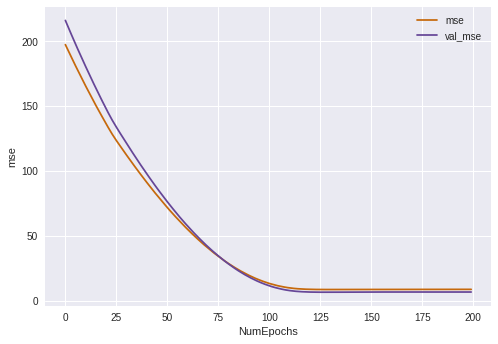

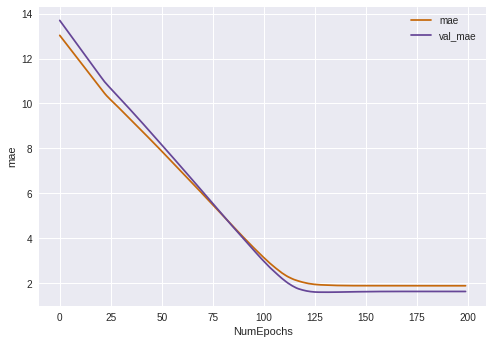

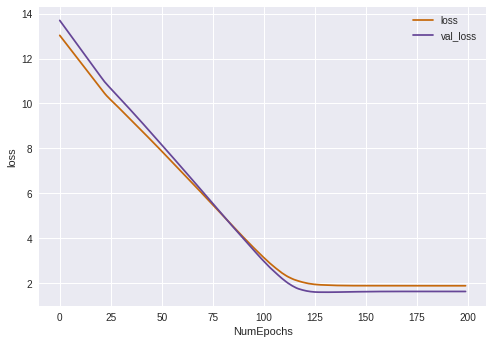

In [83]:
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [86]:
testPreds=model.predict(uniTestFeatures).flatten()


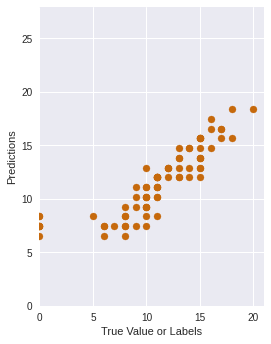

In [89]:

def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(uniTestLabels, testPreds)

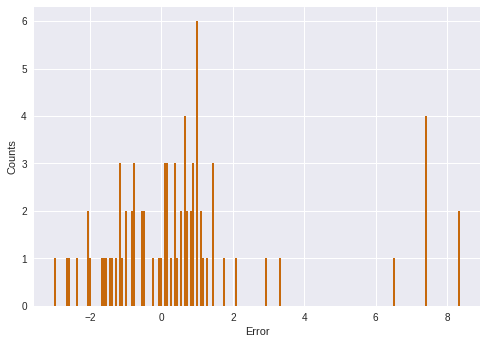

In [91]:
#error plot --> gaussian distribution 

def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, uniTestLabels, numEpochs)